# 第二部分-實際應用

In [ ]:
!pip install requests

#### 今日目標: <br>針對此網站https://www.u-car.com.tw/ 進行一些資料分析

### 步驟1-資料收集(爬蟲應用)

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv



headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}

url = 'https://newcar.u-car.com.tw/newcar/search?bodytype=0&minprice=&maxprice=&size=0&displacement=0&fueltype=0'

response = requests.get(url, headers=headers)


if response.status_code == 200:


    soup = BeautifulSoup(response.text, 'html.parser')

    car_info_elements = soup.select('.newcar_range_ideal') #縮小範圍

    with open('ucar_car_models.csv', 'w', newline='', encoding='utf-8') as csv_file:

        csv_writer = csv.writer(csv_file)

        csv_writer.writerow(['brand','product','cc','price'])

        for car_info_element in car_info_elements:

            car_model = car_info_element.select_one('.title_brand').text.strip()
            car_style = car_info_element.select_one('.title').text.strip()
            cc=car_info_element.select_one('.cc_text').text.strip()
            car_price = car_info_element.select_one('.price_number strong').text.strip()

            csv_writer.writerow([car_model, car_style, cc,car_price])

    print("存於ucar_car_models.csv檔案。")

else:
    print("失敗:", response.status_code)

存於ucar_car_models.csv檔案。


### 步驟2-資料處理

In [ ]:
import pandas as pd #通用習慣pd
#如果沒有pandas-pip

In [ ]:
# pd.read_csv()
df=pd.read_csv('./ucar_car_models.csv',encoding='utf-8')
df

,brand,product,cc,price
0,Aston Martin,DB12,3982,1288
1,Aston Martin,DBS,5204,1680
2,Aston Martin,DBS Volante,5204,1848
3,Aston Martin,DBX,3982,988 - 1438
4,Aston Martin,Vantage,3982,880 - 1088
...,...,...,...,...
379,Volvo,V90 Cross Country,1969,264.5
380,Volvo,XC40,1477,142.9 - 209
381,Volvo,XC40 Recharge,0,191 - 222
382,Volvo,XC60,1969,222 - 326.5


In [ ]:
#顯示出前10筆資料，預設值為5筆資料
df.head(10)

,brand,product,cc,price
0,Aston Martin,DB12,3982,1288
1,Aston Martin,DBS,5204,1680
2,Aston Martin,DBS Volante,5204,1848
3,Aston Martin,DBX,3982,988 - 1438
4,Aston Martin,Vantage,3982,880 - 1088
5,Aston Martin,Vantage Roadster,3982,980 - 1168
6,Audi,A1 Sportback,999,128 - 151.5
7,Audi,A3 Sportback,999,146 - 272
8,Audi,A4,1984,221 - 236
9,Audi,A4 Avant,1984,231 - 292


### 技巧1 缺失值處理

In [ ]:
#isnull().sum()

missing_values = df.isnull().sum()
print("\n缺失值統計:")
print(missing_values)


缺失值統計:
brand      0
product    0
cc         0
price      0
dtype: int64


#### (參考)若有缺失值

In [ ]:
# (參考)若有缺失值
df2 = pd.read_csv('./ucar_car_models2.csv',encoding='unicode_escape')

df2

,brand,product,price
0,Aston Martin,NaN,1288
1,Aston Martin,DBS,1680
2,Aston Martin,DBS Volante,1848
3,Aston Martin,DBX,988 - 1438
4,Aston Martin,Vantage,880 - 1088
...,...,...,...
378,Volvo,V90 Cross Country,264.5
379,Volvo,XC40,142.9 - 209
380,Volvo,XC40 Recharge,191 - 222
381,Volvo,XC60,222 - 326.5


In [ ]:
missing_values = df2.isnull().sum()
print("\n缺失值統計:")
print(missing_values)


缺失值統計:
brand      0
product    1
price      3
dtype: int64


#### 直接刪除有缺的部分 or 想辦法填補該值e.g. 平均值/中位數

In [ ]:
df2 = df2.dropna(subset=['product']) #直接刪除
df2 = df2.dropna(subset=['price']) #直接刪除
df2

,brand,product,price
1,Aston Martin,DBS,1680
2,Aston Martin,DBS Volante,1848
3,Aston Martin,DBX,988 - 1438
4,Aston Martin,Vantage,880 - 1088
5,Aston Martin,Vantage Roadster,980 - 1168
...,...,...,...
378,Volvo,V90 Cross Country,264.5
379,Volvo,XC40,142.9 - 209
380,Volvo,XC40 Recharge,191 - 222
381,Volvo,XC60,222 - 326.5


In [ ]:
missing_values = df2.isnull().sum()
print("\n缺失值統計:")
print(missing_values)


缺失值統計:
brand      0
product    0
price      0
dtype: int64


### 技巧2 欄位統一格式
將車價原本為範圍的選取成高價之數字

In [ ]:
df

,brand,product,cc,price
0,Aston Martin,DB12,3982,1288
1,Aston Martin,DBS,5204,1680
2,Aston Martin,DBS Volante,5204,1848
3,Aston Martin,DBX,3982,988 - 1438
4,Aston Martin,Vantage,3982,880 - 1088
...,...,...,...,...
379,Volvo,V90 Cross Country,1969,264.5
380,Volvo,XC40,1477,142.9 - 209
381,Volvo,XC40 Recharge,0,191 - 222
382,Volvo,XC60,1969,222 - 326.5


In [ ]:
import re
def process_price(value):
    # 使用正則表達式提取 "-" 後的數字
    match = re.search(r'-(.*)', value)

    # 如果有匹配到，返回 "-" 後的數字，否則返回原始值
    return match.group(1) if match else value

# 將函數應用於 "price" 欄位
df['price'] = df['price'].apply(process_price)

# 將 "price" 欄位轉換為數字
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [ ]:
df

,brand,product,cc,price
0,Aston Martin,DB12,3982,1288.0
1,Aston Martin,DBS,5204,1680.0
2,Aston Martin,DBS Volante,5204,1848.0
3,Aston Martin,DBX,3982,1438.0
4,Aston Martin,Vantage,3982,1088.0
...,...,...,...,...
379,Volvo,V90 Cross Country,1969,264.5
380,Volvo,XC40,1477,209.0
381,Volvo,XC40 Recharge,0,222.0
382,Volvo,XC60,1969,326.5


### 步驟3-資料分析

In [ ]:
#查看欄位描述性統計
df.describe()

,cc,price
count,384.000000,384.000000
mean,2075.750000,444.464479
std,1250.493807,494.890102
min,0.000000,0.000000
25%,1496.000000,148.600000
50%,1989.500000,263.750000
75%,2789.750000,527.250000
max,6749.000000,2898.000000


In [ ]:
#查看各廠牌的數量
df.value_counts('brand')#單引號

brand
Mercedes-Benz                     50
BMW                               34
Audi                              32
Toyota                            23
Porsche                           15
Volkswagen                        14
Mazda                             12
Lexus                             12
Ford                              10
Land Rover                         9
Kia                                9
Škoda                              9
Volvo                              9
Ferrari                            8
Volkswagen Commercial Vehicles     8
Hyundai                            8
Subaru                             7
Nissan                             7
Lamborghini                        7
Peugeot                            6
Suzuki                             6
Mitsubishi                         6
Mini                               6
Aston Martin                       6
Maserati                           6
CMC                                6
Citroën                         

In [ ]:
#查看各品牌特定cc數量
cc_counts=df.groupby(['brand','cc']).size().reset_index(name='count')
# 顯示結果
cc_counts

,brand,cc,count
0,Aston Martin,3982,4
1,Aston Martin,5204,2
2,Audi,0,4
3,Audi,999,2
4,Audi,1498,3
...,...,...,...
163,Volvo,0,2
164,Volvo,1477,1
165,Volvo,1969,6
166,Škoda,999,5


In [ ]:
#查看有多少 cc=0 電動車
ele_car=df[df['cc']==0]
ele_car

,brand,product,cc,price
15,Audi,e-tron GT,0,466.00
23,Audi,Q8 e-tron,0,426.50
24,Audi,Q8 Sportback e-tron,0,438.50
32,Audi,RS e-tron GT,0,627.00
56,BMW,i4,0,325.00
57,BMW,i5,0,485.00
58,BMW,i7,0,698.00
59,BMW,iX,0,638.00
60,BMW,iX1,0,228.00
83,Citroën,Ë-C4,0,153.90


In [ ]:
#將結果儲存
outputpath = 'ele_car.csv'
# outputpath是保存文件的路徑

ele_car.to_csv(outputpath,sep=',',index=False,header=True)

#### 進階挑戰-機器學習入門
KNN演算法

<ipython-input-22-c2db355db10a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['brand'] = le.fit_transform(selected_data['brand'])


Accuracy: 0.9333333333333333


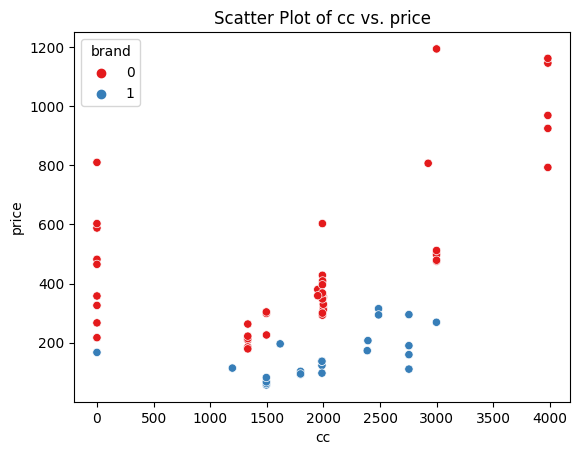

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 選取 "brand" 是 "Toyota" 或 "BMW" 的資料
selected_brands = ['Mercedes-Benz', 'Toyota']
selected_data = df[df['brand'].isin(selected_brands)]

# 將 "brand" 轉換為數字，因為 KNN 算法需要數字型態的輸入
le = LabelEncoder()
selected_data['brand'] = le.fit_transform(selected_data['brand'])

# 分割特徵和目標變數
X = selected_data[['cc', 'price']]
y = selected_data['brand']

# 將資料分割為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 KNN 分類器，這裡假設 K=3
knn = KNeighborsClassifier(n_neighbors=3)

# 訓練模型
knn.fit(X_train, y_train)

# 預測
y_pred = knn.predict(X_test)

# 評估準確性
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 視覺化
sns.scatterplot(x='cc', y='price', hue='brand', data=selected_data, palette='Set1')
plt.title('Scatter Plot of cc vs. price')
plt.show()

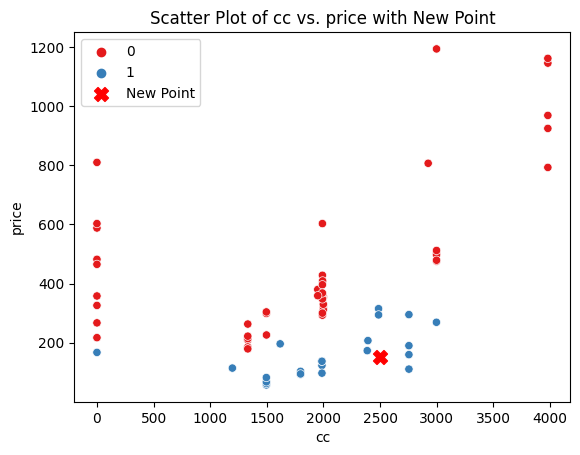

The new point is predicted to belong to the brand: Toyota


In [ ]:
import numpy as np

# 新增一個點
new_cc = 2500  # 你的新 cc 值
new_price = 150.0  # 你的新 price 值
new_point = np.array([[new_cc, new_price]])

# 將新點轉換為與訓練集相同的格式
new_point_df = pd.DataFrame(new_point, columns=['cc', 'price'])
new_point_df['brand'] = knn.predict(new_point_df[['cc', 'price']])

# 視覺化
sns.scatterplot(x='cc', y='price', hue='brand', data=selected_data, palette='Set1')
plt.scatter(new_point_df['cc'], new_point_df['price'], marker='X', s=100, color='red', label='New Point')
plt.title('Scatter Plot of cc vs. price with New Point')
plt.legend()
plt.show()

# 打印新點的預測結果
predicted_brand = le.inverse_transform(new_point_df['brand'])[0]
print(f'The new point is predicted to belong to the brand: {predicted_brand}')


#### 步驟4-視覺化呈現

#### 練習1-cc數與價格的散布圖

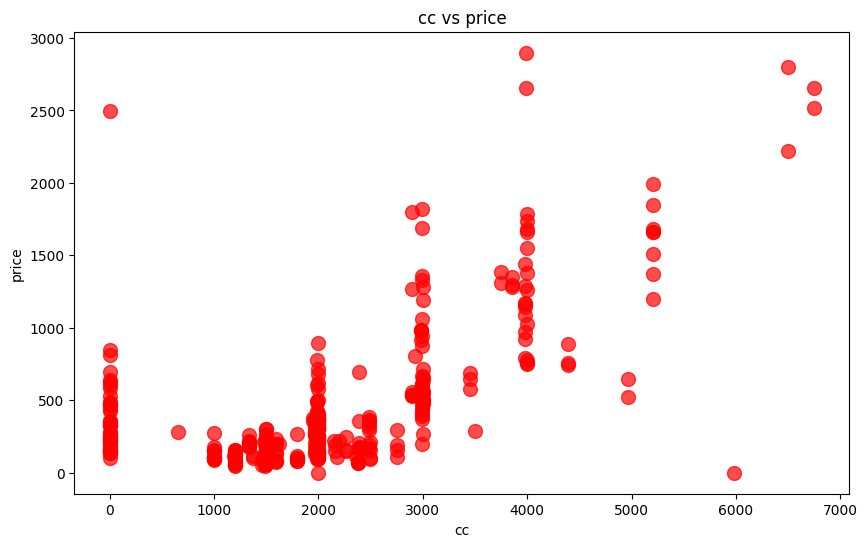

In [ ]:
# 視覺化散點圖
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(df['cc'],df['price'],c='red',alpha=0.7,s=100) #s點大小

# 添加軸標籤和標題
plt.xlabel('cc')
plt.ylabel('price')
plt.title('cc vs price')
# 顯示視覺化圖
plt.show()

#### 練習2-對'BMW', 'Porsche','Toyota' 的價格製作boxplot

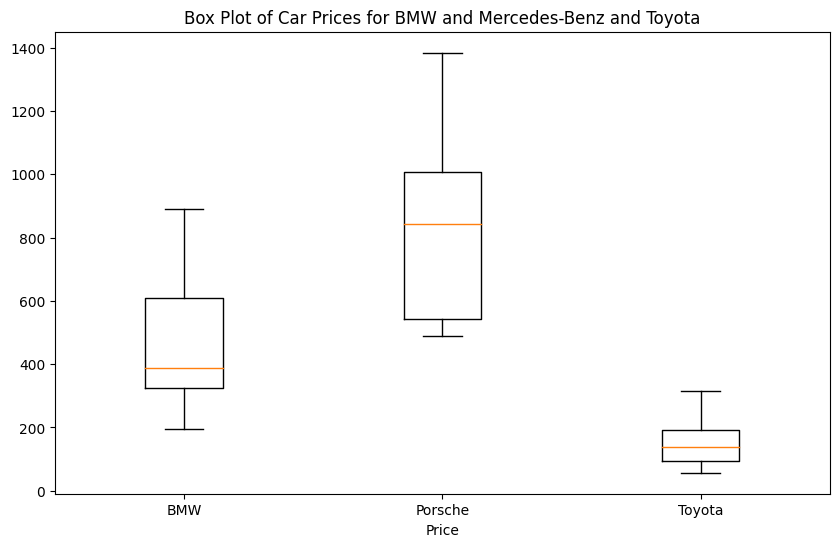

In [ ]:
selected_brands = ['BMW', 'Porsche','Toyota']
selected_data = df[df['brand'].isin(selected_brands)]

# 繪製盒狀圖
plt.figure(figsize=(10, 6))
plt.boxplot([selected_data[selected_data['brand'] == brand]['price'] for brand in selected_brands], labels=selected_brands, vert=True)
plt.xlabel('Price')
plt.title('Box Plot of Car Prices for BMW and Mercedes-Benz and Toyota')
plt.show()

#### 練習3-各家廠牌電動車的平均價格

In [ ]:
#電動車
ele_car

,brand,product,cc,price
15,Audi,e-tron GT,0,466.00
23,Audi,Q8 e-tron,0,426.50
24,Audi,Q8 Sportback e-tron,0,438.50
32,Audi,RS e-tron GT,0,627.00
56,BMW,i4,0,325.00
57,BMW,i5,0,485.00
58,BMW,i7,0,698.00
59,BMW,iX,0,638.00
60,BMW,iX1,0,228.00
83,Citroën,Ë-C4,0,153.90


In [ ]:
#計算平均
ave=ele_car.groupby('brand')['price'].mean().reset_index()
# 顯示結果
ave

,brand,price
0,Audi,489.500000
1,BMW,474.800000
2,CMC,99.700000
3,Citroën,153.900000
4,Ford,249.900000
5,Hyundai,218.900000
6,Jaguar,332.000000
7,Kia,273.900000
8,Lexus,234.450000
9,Luxgen,134.900000


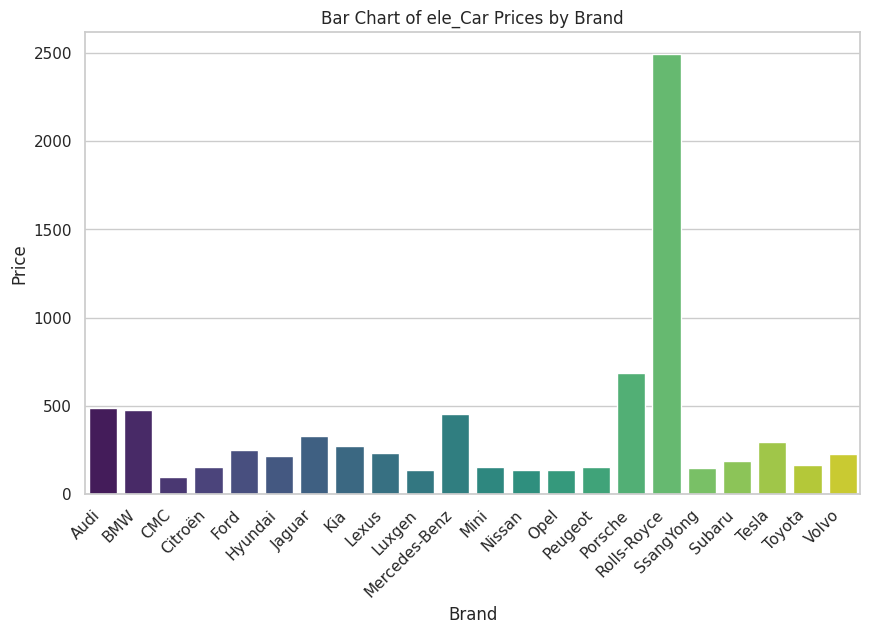

In [ ]:
sns.set(style="whitegrid")

# 使用條形圖
plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='price', data=ave, palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Bar Chart of ele_Car Prices by Brand')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
!pip install 你缺的模組 (!一定要 表示他不是PYTHON 是終端指令)